#### Importing required libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Reading the dataset and display few instances of dataset.

In [3]:
tdata=pd.read_csv("tested.csv")
print(tdata.head(4))

   PassengerId  Survived  Pclass                              Name     Sex  \
0          892         0       3                  Kelly, Mr. James    male   
1          893         1       3  Wilkes, Mrs. James (Ellen Needs)  female   
2          894         0       2         Myles, Mr. Thomas Francis    male   
3          895         0       3                  Wirz, Mr. Albert    male   

    Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
0  34.5      0      0  330911  7.8292   NaN        Q  
1  47.0      1      0  363272  7.0000   NaN        S  
2  62.0      0      0  240276  9.6875   NaN        Q  
3  27.0      0      0  315154  8.6625   NaN        S  


##### Understanding shape of dataset.

In [4]:
print(tdata.shape)

(418, 12)


##### Analysing the number of survived people using seaborn.

<Axes: xlabel='Survived', ylabel='count'>

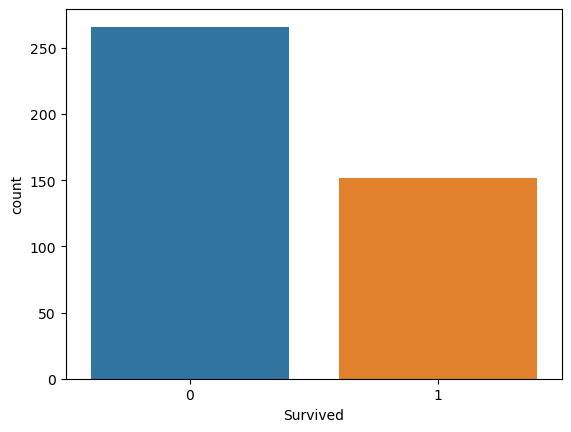

In [5]:
sns.countplot(x="Survived",data=tdata)

##### Understanding features

In [6]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
tdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##### Finding missing values

In [8]:
tdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Data Preprocessing- Handling the missing values

In [11]:
tdata['Cabin'].fillna("notknown", inplace = True)
tdata['Fare'].fillna(tdata['Fare'].mean(), inplace = True)
tdata['Age'].fillna(tdata['Age'].mean(), inplace = True)
tdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,notknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,notknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,notknown,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,notknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,notknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,notknown,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,notknown,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,notknown,S


##### Visualising and understanding the survivors based on their gender.

<Axes: xlabel='Survived', ylabel='count'>

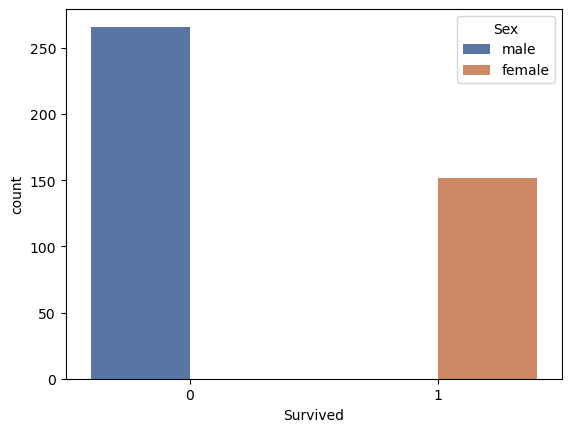

In [13]:
sns.countplot(x="Survived",hue="Sex",data=tdata,palette="deep")

In [18]:
msurvived=tdata[(tdata['Sex']=="male") & (tdata['Survived']==1)]
fsurvived=tdata[(tdata['Sex']=="female") & (tdata['Survived']==1)]
print("No of males survived-> ",len(msurvived))
print("No of males survived-> ",len(fsurvived))

No of males survived->  0
No of males survived->  152


In [19]:
tdata.groupby('Sex')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,1.0,2.144737,30.272400,0.565789,0.598684,49.747699
male,0.0,2.334586,30.272699,0.379699,0.274436,27.558326


### Using Logistic Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### Changing the gender values into numeric form for the training the data.

In [22]:
tdata['Sex_changed'] = tdata['Sex'].replace({'male' : 0 , 'female' : 1})

##### Feature Extraction

In [24]:
X = tdata[['Age', 'Pclass', 'Sex_changed']]
y = tdata['Survived']  

##### Training and testing datasets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

##### Training the model and fitting of the data.

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred =model.predict(X_test)

##### Evaluation of the Model

In [40]:
accuracy = accuracy_score(y_test, y_pred)
confusion= confusion_matrix(y_test, y_pred)
classification= classification_report(y_test, y_pred)

print("Accuracy-> ",accuracy)
print('Confusion Matrix:\n',confusion)
print('Classification Report : \n ',classification)

Accuracy->  1.0
Confusion Matrix:
 [[26  0]
 [ 0 16]]
Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        16

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



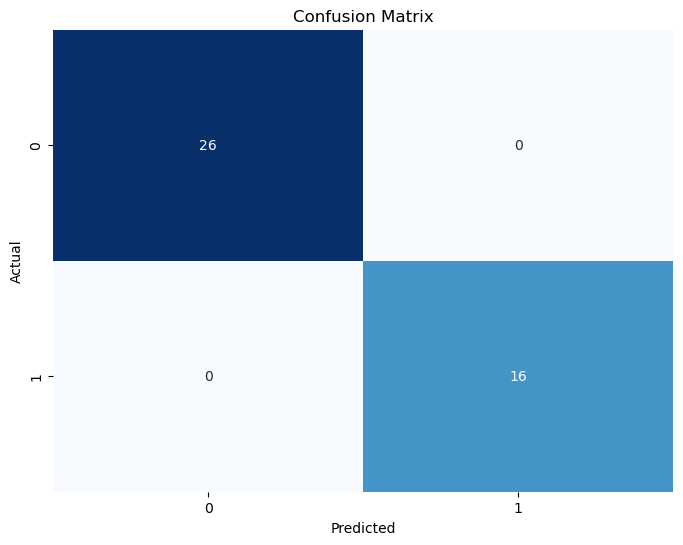

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()